In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('chained_assignment',None)

## Data exploration and preparation

### Load data

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

### First exploration

In [49]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

### Handling of missing values

In [281]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [174]:
df.loc[pd.isnull(df['reviews_per_month'])].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.0,0.0,10052.000000,10052.000000
mean,2.257484e+07,8.068437e+07,40.732099,-73.956117,192.919021,11.519797,0.0,NaN,14.793275,104.660466
std,1.135563e+07,8.712593e+07,0.052598,0.043796,358.653017,29.207928,0.0,NaN,50.363637,139.072127
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208404e+07,1.207519e+07,40.697570,-73.984758,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.337757e+07,3.979538e+07,40.728870,-73.960175,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.402092e+07,1.330001e+08,40.763643,-73.939877,200.000000,14.000000,0.0,NaN,2.000000,214.250000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,1000.000000,0.0,NaN,327.000000,365.000000


In [175]:
df.loc[pd.notnull(df['reviews_per_month'])].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Results from missing value analysis:
- There is a higher amount of missing data in the variables 'reviews_per_month'(10052) and 'last_review' (10052)
- The missing values in the variable reviews_per_month seem to be present, when the number of reviews is zero. In this case it is plausible that the value in reviews_per_month is also zero.
- The missing values for the variable 'last_review' can not be reconstructed. As this variable brings no further information value compared to 'reviews_per_month', it is dropped.
- There are few missing values within the variables 'name' and 'host_name' which can not be reconstructed. The respective rows will be dropped.

In [3]:
df['reviews_per_month'].fillna(0, inplace=True)

In [4]:
df.drop(columns = ['last_review'], inplace=True)

In [5]:
df = df.dropna()

In [285]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Check for duplicates

In [296]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### Drop further columns

The following variables are candidates for dropping:
- id: this variable is not usable for the further analysis
- host_id: as we have the information on the listings count of the host of a listing, this variable is also irrelevant
- host_name: the gender of the host might be of interest. This challenge should not be tackled in this analysis though
- name: this variable might be kept during exploratory data analysis for  orientation purposes to get an impression of the listing 
- number of reviews: this variable brings no further information value compared to reviews per month

In [6]:
df.drop(columns = ['id','host_id', 'host_name', 'number_of_reviews'], inplace=True)

## Explore categorical data

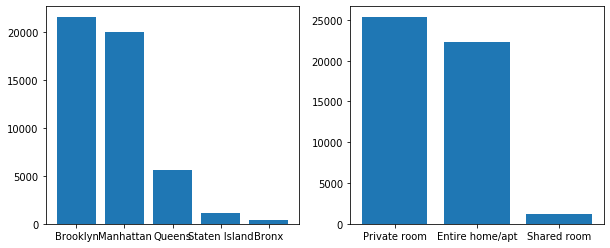

In [274]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, col in zip(axes, df[['neighbourhood_group', 'room_type']]):
    ax.bar(df[col].unique(), df[col].value_counts())

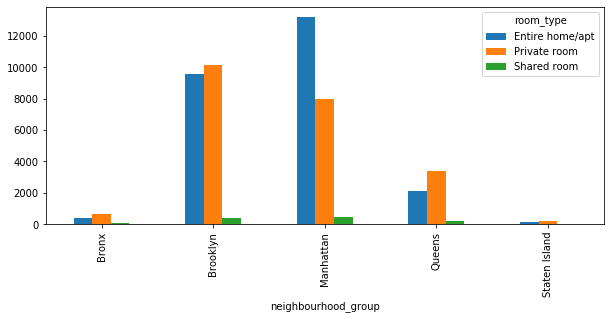

In [275]:
pd.crosstab(df['neighbourhood_group'], df['room_type']).plot.bar(figsize=(10,4));

In [161]:
df['neighbourhood'].value_counts().head(15)

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Hell's Kitchen        1954
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
East Harlem           1116
Greenpoint            1113
Chelsea               1112
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

In [83]:
df['neighbourhood'].nunique()

221

## Explore numerical data

In [7]:
df.describe()

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,40.728941,-73.952170,152.740309,7.012444,1.091124,7.148369,112.801425
std,0.054528,0.046159,240.232386,20.019757,1.597270,32.964600,131.610962
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,0.370000,1.000000,45.000000
75%,40.763107,-73.936280,175.000000,5.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,58.500000,327.000000,365.000000


The price range is between 0 and 10000 dollars per day. Mean 152 dollars with a high standard deviation of 240.

### Check for outliers

Univariate outliers

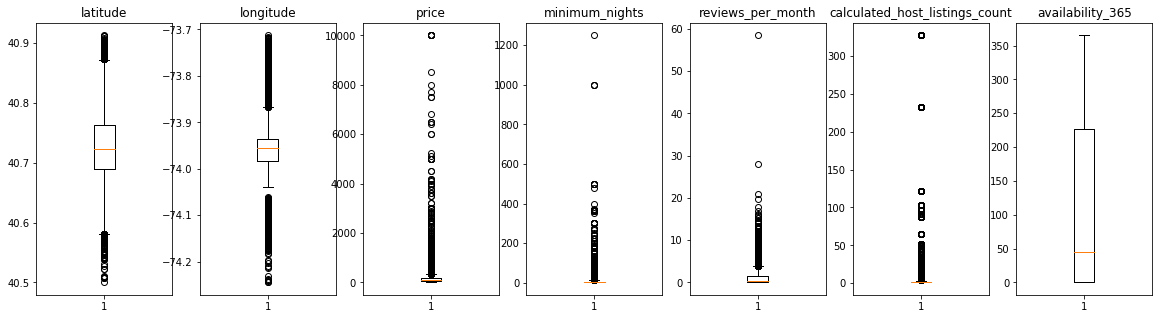

In [304]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
cols = []
for col in df.select_dtypes(exclude='object').columns:
    cols.append(col)
for i in range(len(cols)):
    ax = axes[i]
    col = cols[i]
    ax.set_title(col)
    ax.boxplot(df[col])

To improve distribution of the data, the outliers will be removed.

In [8]:
df = df.loc[df['reviews_per_month'] < 25]
df = df.loc[df['minimum_nights']< 600]
df = df.loc[df['price']< 6500]
df = df.loc[df['calculated_host_listings_count']<150]

### Explore pairwise relations between numerical variables

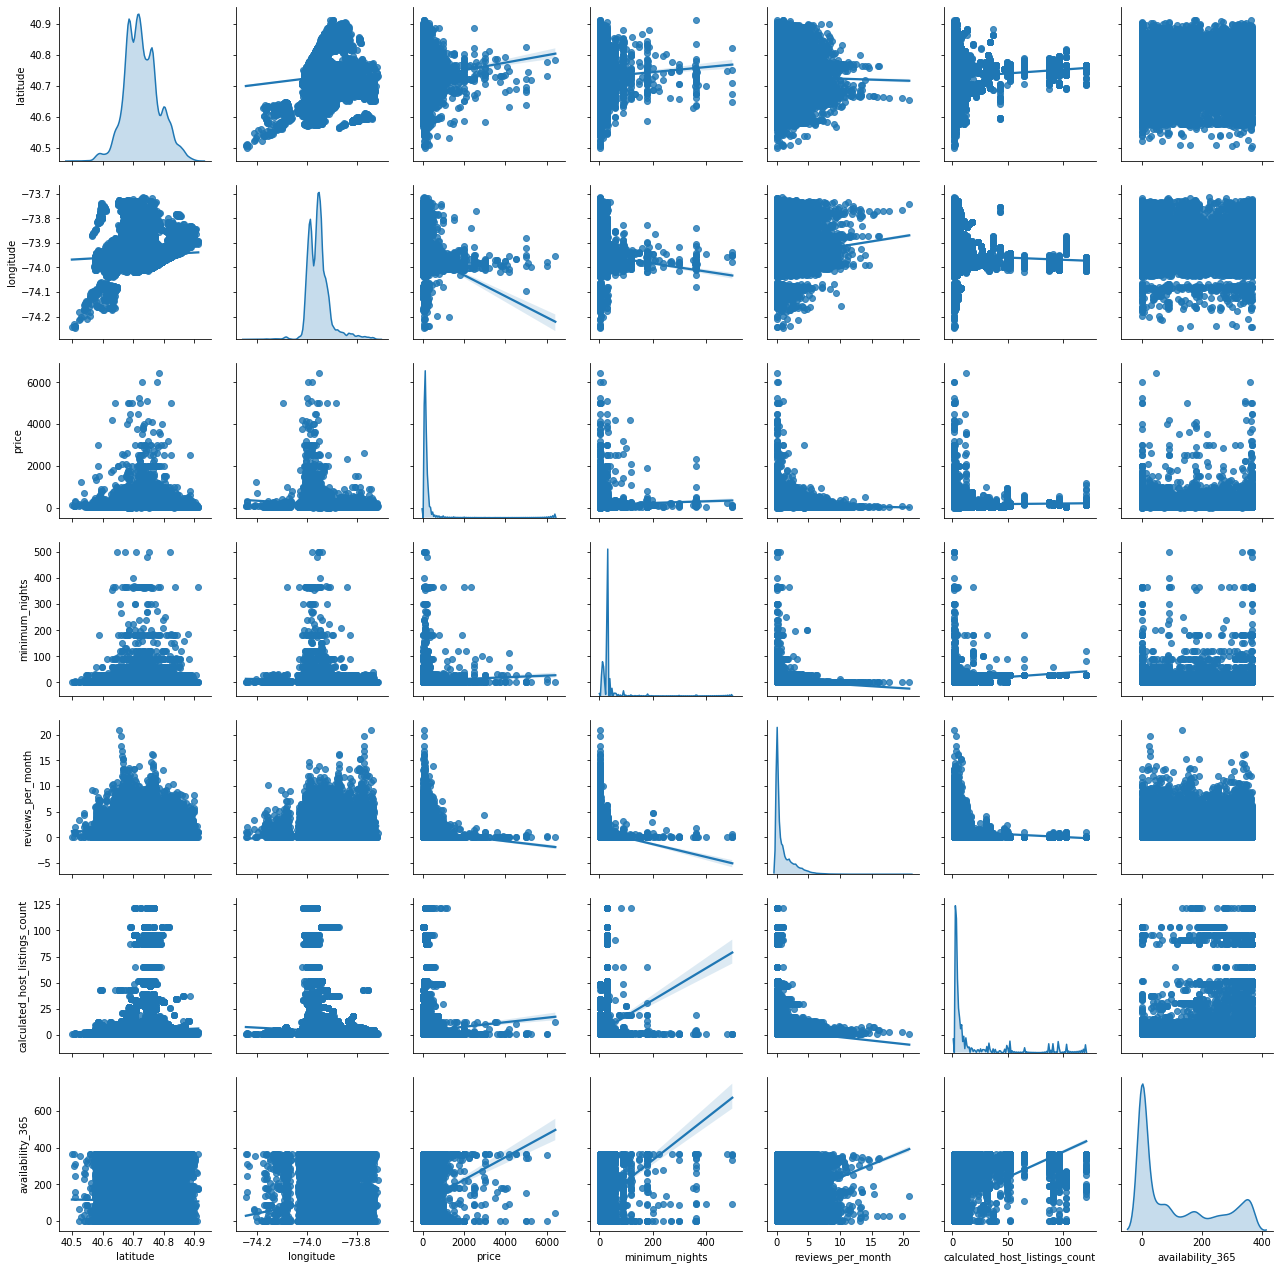

In [110]:
sns.pairplot(df.select_dtypes(exclude='object'), kind='reg', diag_kind='kde');

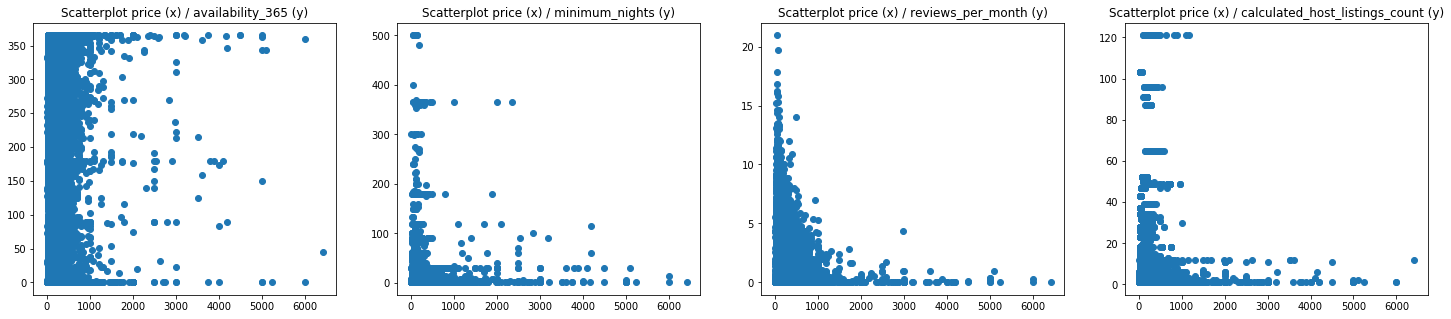

In [111]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
ax1 = axes[0]
ax1.scatter(df['price'], df['availability_365'])
ax1.set_title('Scatterplot price (x) / availability_365 (y)')
ax2 = axes[1]
ax2.scatter(df['price'], df['minimum_nights'])
ax2.set_title('Scatterplot price (x) / minimum_nights (y)')
ax3 = axes[2]
ax3.scatter(df['price'], df['reviews_per_month'])
ax3.set_title('Scatterplot price (x) / reviews_per_month (y)')
ax4 = axes[3]
ax4.scatter(df['price'], df['calculated_host_listings_count'])
ax4.set_title('Scatterplot price (x) / calculated_host_listings_count (y)');

- There is a high spread of prices in the data
- The scatterplots of price with minimum_nights and calculated_host_listings_count show a high density of data points with prices below 1000 dollars and lower values of the variables. Higher values of these variables also seem to occur mainly with prices below 1000 dollars.
- In the scatterplot of price with reviews per month an increase of reviews per month is visible with lower prices.
- There is no apparent pattern in the scatterplot of price with availability_365

### Exploring bivariate patterns between numerical and categorical variables

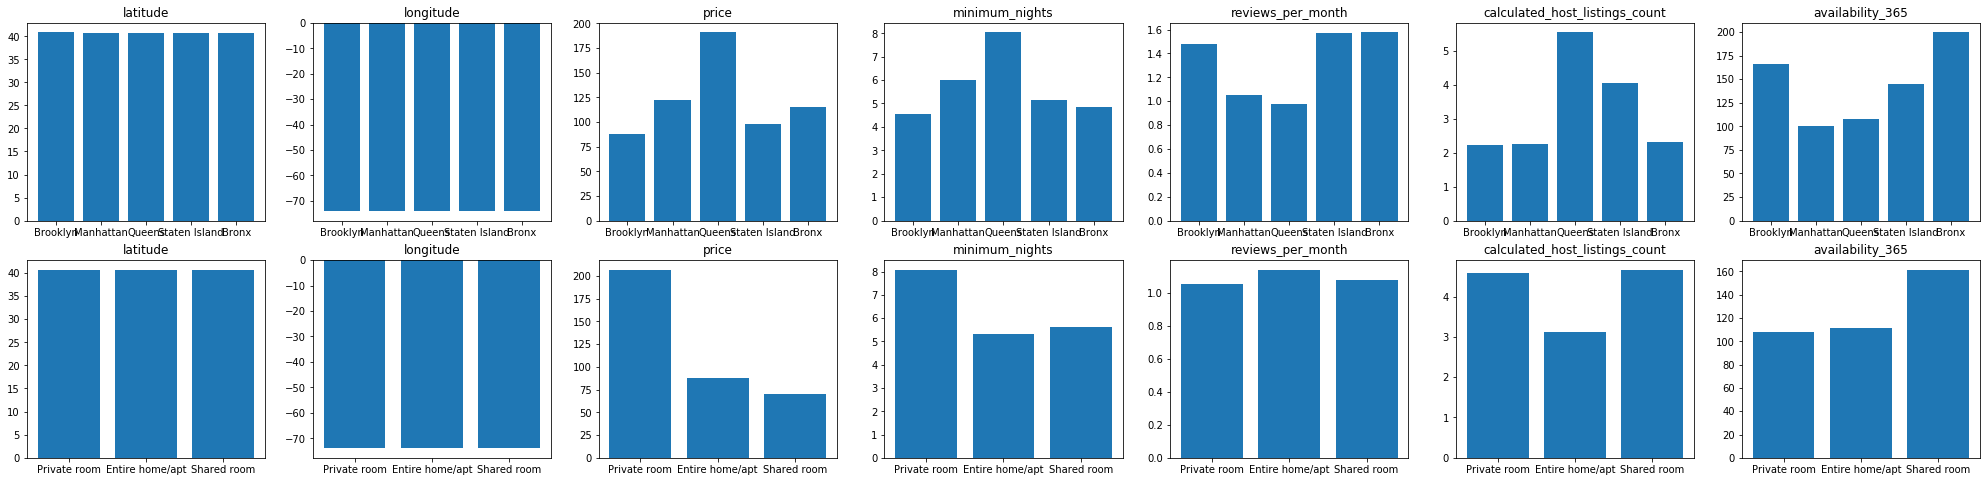

In [112]:
fig, axes = plt.subplots(2, 7, figsize=(35, 8))
cols = []
for col1 in df[['neighbourhood_group', 'room_type']]:
    for col2 in df.select_dtypes(exclude='object').columns:
        cols_sep=[]
        cols_sep.append([col1, col2])
        cols.append(cols_sep)
for ax, colpair in zip(axes.reshape(14), cols):
    ax.bar(df[colpair[0][0]].unique(), df.groupby(colpair[0][0])[colpair[0][1]].mean())  
    ax.set_title(colpair[0][1])

- Location seems to be an influencing factor on price, the mean values of the neighbourhood_groups differ considerably
- Room types also show differing mean price values with private rooms being rent at the highest mean price

### Exploring 3D patterns

Spacial patterns

In [113]:
price_over1000 = df[df['price']>1000]
price_under50 = df[df['price']<50]

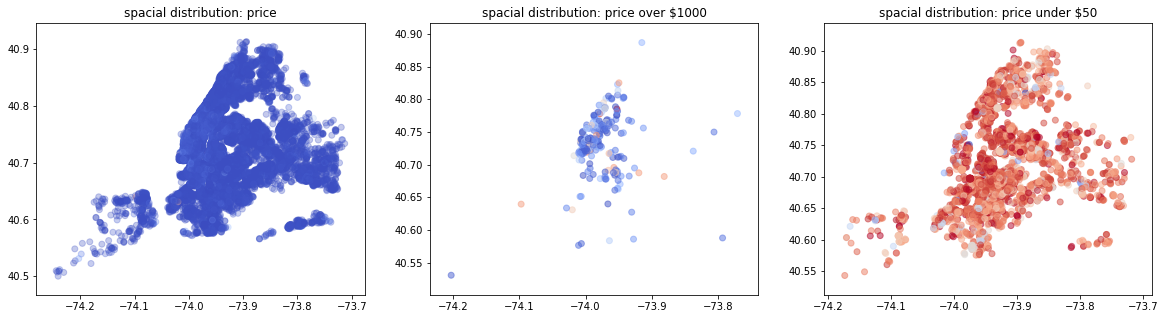

In [114]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
ax1= axes[0]
ax1.scatter(df['longitude'], df['latitude'], c=df['price'], cmap="coolwarm", alpha=0.3)
ax1.set_title('spacial distribution: price')
ax2= axes[1]
ax2.scatter(price_over1000['longitude'], price_over1000['latitude'], c=price_over1000['price'], cmap="coolwarm", alpha=0.5)
ax2.set_title('spacial distribution: price over $1000')
ax3= axes[2]
ax3.scatter(price_under50['longitude'], price_under50['latitude'], c=price_under50['price'], cmap="coolwarm", alpha=0.5)
ax3.set_title('spacial distribution: price under $50');

- Due to the high spread of prices, the lower prices dominate the density of the spatial distribution and no spacial pattern with respect to differing prices is visible
- The highest prices seem to be located in Manhattan though, this shows again, that location is a factor for pricing in New York
- With the lowest prices no spacial pattern is apparent again

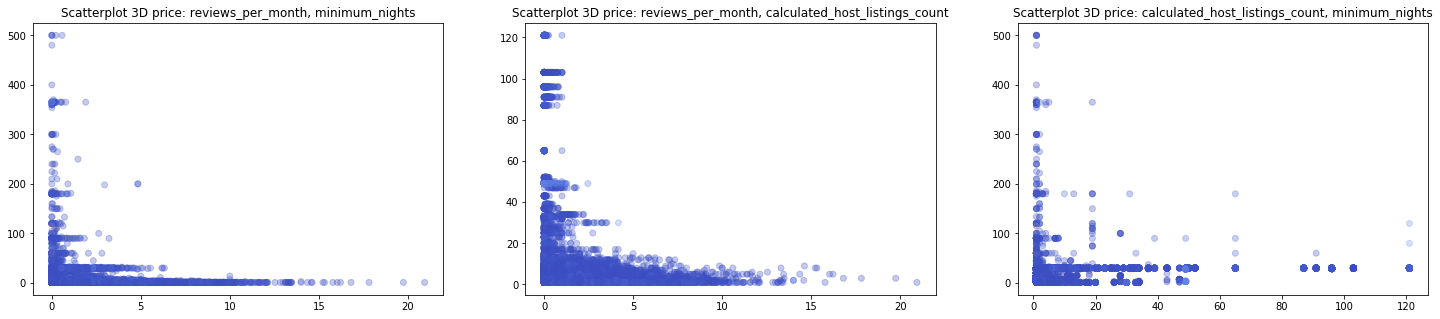

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(25,5))
ax1 = axes[0]
ax1.scatter(df['reviews_per_month'], df['minimum_nights'], c=df['price'], cmap="coolwarm", alpha=0.3)
ax1.set_title('Scatterplot 3D price: reviews_per_month, minimum_nights')
ax2 = axes[1]
ax2.scatter(df['reviews_per_month'], df['calculated_host_listings_count'], c=df['price'], cmap="coolwarm", alpha=0.3)
ax2.set_title('Scatterplot 3D price: reviews_per_month, calculated_host_listings_count')
ax3 = axes[2]
ax3.scatter(df['calculated_host_listings_count'], df['minimum_nights'], c=df['price'], cmap="coolwarm", alpha=0.3)
ax3.set_title('Scatterplot 3D price: calculated_host_listings_count, minimum_nights');

### Distribution of target variable

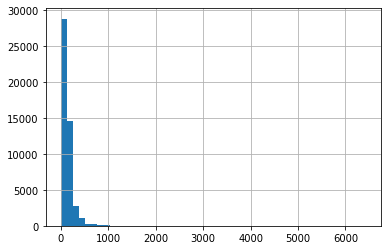

In [116]:
df['price'].hist(bins=50);

In [303]:
df['price']=np.cbrt(np.cbrt(df['price']+1))

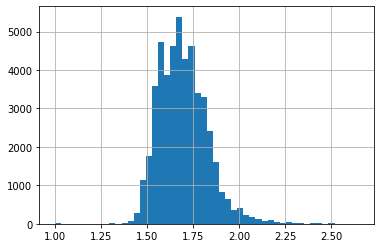

In [304]:
df['price'].hist(bins=50)

### Encoding of categorical variables

Location and room type seem to be influencing factors on price. As the variable neighbourhood provides a more differentiated granularity than neighbourhood_group, this variable and room type will be encoded to include them in predictive modelling. To limit the number of dimensions binary encoding is applied for neighbourhood, yielding also similar good properties for predictions as one hot encoding. Room type will be encoded with one hot encoding.

In [60]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

In [305]:
df = df.reset_index()

In [306]:
onehotencoder = OneHotEncoder()
ohe_rt = onehotencoder.fit_transform(df['room_type'][:, np.newaxis])
ohe_rt_df = pd.DataFrame(ohe_rt.toarray(), columns=onehotencoder.get_feature_names())

In [307]:
binaryencoder_nh = BinaryEncoder()
bin_nh = binaryencoder_nh.fit_transform(np.array(df['neighbourhood'][:, np.newaxis]))

In [308]:
index_raw=list(np.arange(1,48279, 1))
bin_nh['id'] = index_raw
df['id']=index_raw
ohe_rt_df['id']=index_raw

In [309]:
df = df.merge(ohe_rt_df, on='id')
df = df.merge(bin_nh, on='id')

In [310]:
df.drop(columns=['name', 'neighbourhood_group', 'room_type', 'neighbourhood', 'id', 'index'], inplace=True)

In [311]:
df['0_0'][df['0_0']==1].sum()

0

In [312]:
df = df.drop(columns=['0_0'])

## Predictive Modelling: pricing

### Assumptions regression: normal distribution and homoscedasticity of resdiuals

In [96]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

In [313]:
model_res = sm.OLS(df['price'], df.drop(columns=['price']))

In [314]:
model_res_fit = model_res.fit()

In [315]:
model_fitted_y = model_res_fit.fittedvalues
model_residuals = model_res_fit.resid

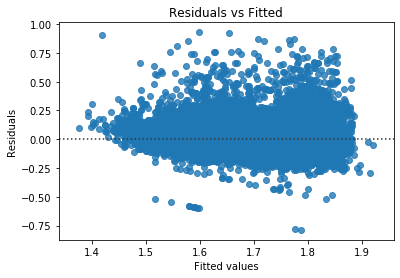

In [316]:
res_plot = plt.figure()
res_plot.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=df)
res_plot.axes[0].set_title('Residuals vs Fitted')
res_plot.axes[0].set_xlabel('Fitted values')
res_plot.axes[0].set_ylabel('Residuals');

This residual plot shows only weak problems with normal distribution and homoscedasticity of residuals in the data. The highest density of data points is around the center line and there is only a small decrease of density towards the left area of the plot.

In [317]:
model_norm_residuals = model_residuals/np.std(model_residuals)

In [318]:
QQ = ProbPlot(model_norm_residuals)

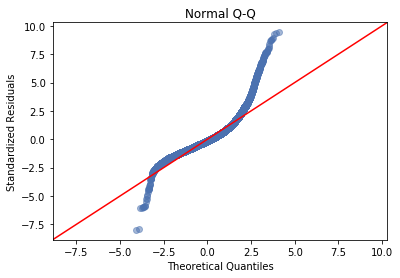

In [319]:
res_plot_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
res_plot_2.axes[0].set_title('Normal Q-Q')
res_plot_2.axes[0].set_xlabel('Theoretical Quantiles')
res_plot_2.axes[0].set_ylabel('Standardized Residuals');

The Q-Q Plot shows problems with normal distribution of residuals. According to the first plot these violations seem not to be severe and are acceptable for real world data.

### Assumptions multiple regression: multicollinearity

In [320]:
corr = df.drop(columns='price').corr(method='pearson')

In [367]:
multicollinearity, V=np.linalg.eig(corr)
(multicollinearity < 0.1).sum()

1

There is a problem with multicollinearity in the data. One value is around zero. This must be considered when training the model.

## Model training and optimization

In [187]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Create training and testdataset

In [322]:
X = df.drop(columns=['price'])
y=df['price']

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

Create validation dataset

In [325]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, train_size=0.8)

### Model training: Linear Regression

In [326]:
model_linreg = LinearRegression(fit_intercept=False, normalize=True)

In [327]:
model_linreg.fit(X_train_val, y_train_val)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [328]:
y_pred_train_val = model_linreg.predict(X_train_val)
y_pred_test_val = model_linreg.predict(X_test_val)

In [329]:
r2_linreg_train_val = metrics.r2_score(y_train_val, y_pred_train_val)
r2_linreg_test_val = metrics.r2_score(y_test_val, y_pred_test_val)
r2_linreg_train_val, r2_linreg_test_val

(0.4501205645773714, 0.4571347144591149)

In [330]:
model_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

Model evalutation: Linear Regression

In [331]:
y_pred_linreg = model_linreg.predict(X_test)

In [332]:
r2_linreg = metrics.r2_score(y_test, y_pred_linreg)
r2_linreg

0.4520159759447149

### Model training: KernelRidge

Next it should be tested with the model class KernelRidge and kernel 'poly', if a polynomial expansion improves the prediction result.Furthermore Ridge deals better with multicollinearity issues through shrinkage/regularization.

In [206]:
from sklearn.kernel_ridge import KernelRidge

In [354]:
gammas = np.logspace(-15,-10, base=2, num=8)
alphas = np.logspace(-15, -10, base=2, num=8)
param_grid = {
    'kernelridge__gamma': gammas,
    'kernelridge__alpha':alphas,
}

In [355]:
pipeline = Pipeline([
    ('standardization', StandardScaler()),
    ('kernelridge', KernelRidge(kernel='poly', degree=4))
])

In [356]:
model_kernelridge = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=4,
    scoring="r2")

In [357]:
model_kernelridge.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardization',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kernelridge',
                                        KernelRidge(alpha=1, coef0=1, degree=4,
                                                    gamma=None, kernel='poly',
                                                    kernel_params=None))],
                                verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'kernelridge__alpha': array([3.05175781e-05, 5.00692966e-05, 8.21472286e-05, 1.34776552e-04,
       2.21123941e-04, 3.62791574e-04, 5.95221511e-04, 9.76562500e-04]),
                         'kernelridge__gamma': array([3.05175781e-05, 5.00692966e-

In [358]:
model_kernelridge.best_params_

{'kernelridge__alpha': 8.214722855422097e-05,
 'kernelridge__gamma': 0.0005952215108420286}

In [359]:
y_pred_val_ridge = model_kernelridge.predict(X_test_val)
y_pred_train_val_ridge = model_kernelridge.predict(X_train_val)

In [360]:
r2_ridge_val_train = metrics.r2_score(y_train_val, y_pred_train_val_ridge)
r2_ridge_val_test = metrics.r2_score(y_test_val, y_pred_val_ridge)
r2_ridge_val_train, r2_ridge_val_test

(0.5541414486219811, 0.5416899079848796)

In [361]:
model_kernelridge_final = Pipeline([
    ('standardization', StandardScaler()),
    ('kernelridge', KernelRidge(kernel='poly', degree=4, alpha=0.00008215, gamma=0.00059522))
])

In [362]:
model_kernelridge_final.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardization',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelridge',
                 KernelRidge(alpha=8.215e-05, coef0=1, degree=4,
                             gamma=0.00059522, kernel='poly',
                             kernel_params=None))],
         verbose=False)

Model evaluation: KernelRidge

In [363]:
y_pred_kernelridge = model_kernelridge_final.predict(X_test)

In [364]:
r2_kernelridge_test = metrics.r2_score(y_test, y_pred_kernelridge)
r2_kernelridge_test

0.5442943779244709

### Model training: RandomForestRegressor

In [246]:
from sklearn.ensemble import RandomForestRegressor

In [337]:
param_grid = { 
    'randomforestregressor__n_estimators': [500, 750],
    'randomforestregressor__max_depth' : np.logspace(3, 5, base=2, num=6)
}

In [338]:
pipeline2 = Pipeline([
    ('standardization', StandardScaler()),
    ('randomforestregressor', RandomForestRegressor())
])

In [339]:
model_rf_val = GridSearchCV(
            pipeline2,
            param_grid,
            cv=5,
            n_jobs=4)

In [340]:
model_rf_val.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardization',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [341]:
model_rf_val.best_params_

{'randomforestregressor__max_depth': 13.928809012737984,
 'randomforestregressor__n_estimators': 500}

In [342]:
y_pred_rf_val = model_rf_val.predict(X_test_val)

In [343]:
r2_rf = metrics.r2_score(y_test_val, y_pred_rf_val)
r2_rf

0.5673145296595506

In [344]:
model_rf = Pipeline([
    ('standardization', StandardScaler()),
    ('randomforestregressor', RandomForestRegressor(max_depth=13.93, n_estimators=500))
])

In [345]:
model_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardization',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=13.93,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

Model evaluation: RandomForestRegressor

In [348]:
r2_rf_final = metrics.r2_score(y_test, y_pred_rf)
r2_rf_final

0.5761525352877422

## Summary: Model performance in predictive modelling for pricing

|model class|r2|
|-----------|--|
|Linear regression|0.45|
|KernelRidge|0.54|
|RandomForestRegressor|0.58|